In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from src.vae import *

In [2]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('dataset', train=True, download=True,
                                transform=torchvision.transforms.ToTensor(),
                                ), batch_size=batch_size, shuffle=True)

In [3]:
test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('dataset', train=False, download=True,
                                transform=torchvision.transforms.ToTensor(),
                                ), batch_size=batch_size, shuffle=True)

In [4]:
input_size = 28*28
output_size = 28*28

Epoch 0
0
loss = 5753.763671875
reconstruct images


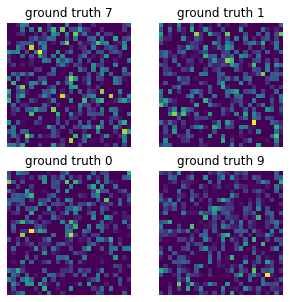

generate synthetic data


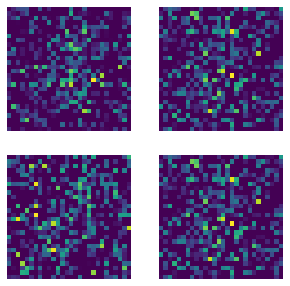

Epoch 1
0
loss = 1398.652587890625
reconstruct images


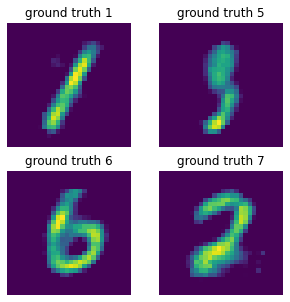

generate synthetic data


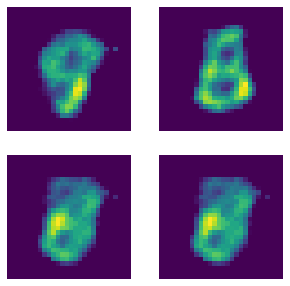

Epoch 2
0
loss = 1265.786376953125
reconstruct images


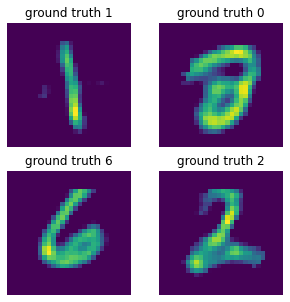

generate synthetic data


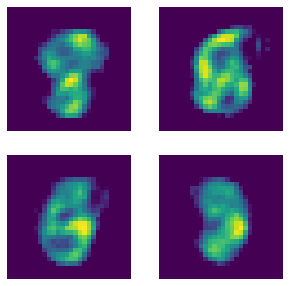

Epoch 3
Epoch 4


In [5]:
max_epochs = 5
show_step = 100
input_size = 28 * 28
output_size = 28 * 28
vae = VAE(256, 256, 256, input_size, output_size)
opt = torch.optim.Adam(vae.parameters(), lr=1e-3)
for epoch in range(max_epochs):
    print("Epoch {0}".format(epoch))
    for i, batch in enumerate(train_loader):
        x, y = batch
        x = x.view(x.shape[0], -1)
        opt.zero_grad()
        reconstruction, mu, logsigma = vae.forward_elbo(x)
        loss = -vae.loss_function(x, reconstruction, mu, logsigma).mean(-1)
        loss.backward()
        opt.step()
        if i == 0 and (epoch == 0 or epoch == 1 or epoch == 2) :
            print(i)
            print("loss = {0}".format(loss.item()))
            print("reconstruct images")
            show_reconstruct_mnist(2,2,reconstruction, y)
            print("generate synthetic data")
            gen_data = vae.gen_sample_data(4, mu, logsigma)
            show_generate_mnist(2, 2, gen_data)

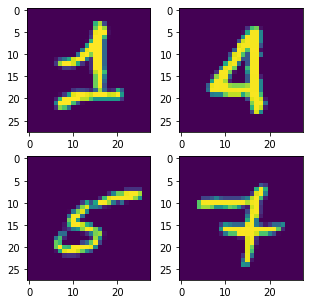

In [6]:
show_mnist(2,2,train_loader)